# Cálculo del valor de decisón óptimo para el caso de una regla de decisión MAP en una observación discreta

## Consigna: 

Suponga que se transmite un símbolo binario  $A \in \{ 0,1 \}$  con probabilidades a priori $P_A(0)=q$ y $P_A(1) =1-q$ a través de un canal BSC. La observación $Y \in \{ 0, 1 \}$ también es binaria e igual a $A$ con probabilidad $1-p$.

1. Encuentre cualitativamente la regla de decisión MAP para el caso de $q= 0.9$ y $p= 0.2$.
2. Encuentre cualitativamente la regla de decisión MAP para el caso de $q= 0.5$ y $p= 0.3$.
3. A diferencia del caso ML, si suma todas las barras del histograma obtenido no van a obtener como resultado 1. Puede intuir a que se debe?
4. En cual de los casos (punto 1 o punto 2) esta regla de decisión es óptima? dicho en otras palabras, cuando esta regla de decisión produce la minima probabilidad de error?
5. Realice y adjunte la simulación Monte Carlo del problema.

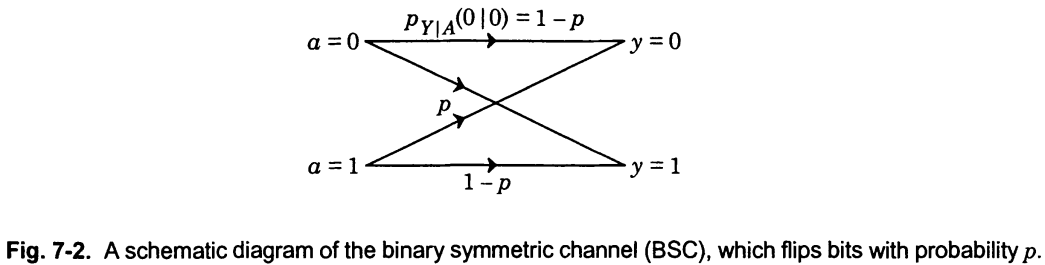

## Desarrollo:

### 1. Encuentre cualitativamente la regla de decisión MAP para el caso de $q= 0.9$ y $p= 0.2$

Teniendo en cuenta el valor de $q$:

 $P_A(0)=0.9$ y $P_A(1) = 0.1$

Teniendo en cuenta el valor de $p$:

- $P_{Y|A}(0|0) = 0.8$
- $P_{Y|A}(1|0) = 0.2$
- $P_{Y|A}(0|1) = 0.2$
- $P_{Y|A}(1|1) = 0.8$

Multiplicando las probabilidades:

- $P_{Y|A}(0|0) \cdot P_A(0) = 0.8 \cdot 0.9 = 0.72$
- $P_{Y|A}(1|0) \cdot P_A(0) = 0.2 \cdot 0.9 = 0.18$
- $P_{Y|A}(0|1) \cdot P_A(1) = 0.2 \cdot 0.1 = 0.02$
- $P_{Y|A}(1|1) \cdot P_A(1) = 0.8 \cdot 0.1 = 0.08$

Por lo que, cualitativamente hablando, la regla de decisión sería que siempre se trata de la hipotesis $\hat{A}=0$.

### 2. Encuentre cualitativamente la regla de decisión MAP para el caso de $q= 0.5$ y $p= 0.3$

Teniendo en cuenta el valor de $q$ la fuente es equiprobable.

Teniendo en cuenta el valor de $p$:

- $P_{Y|A}(0|0) = 0.7$
- $P_{Y|A}(1|0) = 0.3$
- $P_{Y|A}(0|1) = 0.3$
- $P_{Y|A}(1|1) = 0.7$

Multiplicando las probabilidades por la probabilidad de la fuente:

- $P_{Y|A}(0|0) \cdot P_A(0) = 0.7 \cdot 0.5 = 0.35$
- $P_{Y|A}(1|0) \cdot P_A(0) = 0.3 \cdot 0.5 = 0.15$
- $P_{Y|A}(0|1) \cdot P_A(1) = 0.3 \cdot 0.5 = 0.15$
- $P_{Y|A}(1|1) \cdot P_A(1) = 0.7 \cdot 0.5 = 0.35$

En este caso, cualitativamente hablando, es redundante la regla de decisión MAP, sería mas sencillo utilizar la regla de decisión ML, y dicha regla sería que para valor observado, es muy probable que se trate del valor de la fuente. Entonces para $y > 0$ corresponde $\hat{H} = 1$ y $\hat{H}=0$ para caso contrario. Aclarando que con cada decision existe una posibilidad de error del 30%.

### 3. A diferencia del caso ML, si suma todas las barras del histograma obtenido no van a obtener como resultado 1. Puede intuir a que se debe?

Esto se debe a que a cada barra del histograma hay que multiplicarla por la probabilidad de la fuente, entonces en los casos en que la fuente no es equiprobable estos resultados no suman 1.

### 4. En cual de los casos (punto 1 o punto 2) esta regla de decisión es óptima? dicho en otras palabras, cuando esta regla de decisión produce la minima probabilidad de error?

En el primer caso (punto 1), la regla de decisión es óptima, generando la menor probabilidad de error, en el segundo punto para que la regla de decisión sea optima tendría que ser regla de decisión ML.

### 5. Realice y adjunte la simulación Monte Carlo del problema

In [3]:
import random

# Simula una fuente binaria con probabilidad q = threshold
def entrada(threshold):
    if random.random() < threshold:
        return 0
    else:
        return 1

# Simula un canal BSC, con probabilidad de fuente p y de canal q
def monte_carlo(n, q, p):
    probabilidades_condicionadas = [0, 0, 0, 0]
    
    for _ in range(n):
        y = entrada(q)
        condicion = random.random() > p
        
        if y == 0 and condicion:
            probabilidades_condicionadas[0] += 1
        elif y == 1 and not condicion:
            probabilidades_condicionadas[1] += 1
        elif y == 0 and not condicion:
            probabilidades_condicionadas[2] += 1
        else:
            probabilidades_condicionadas[3] += 1
            
    probabilidades_condicionadas = [prob / n for prob in probabilidades_condicionadas]
    return probabilidades_condicionadas

# Ejecución de Monte Carlo
n = 1000000

# Caso 1 (q = 0.9, p = 0.2)
q = 0.9
p = 0.2
print("Caso 1 (q = 0.9, p = 0.2)")
print("Probabilidades Condicionales (teniendo en cuenta la fuente): ", monte_carlo(n, q, p))

# Caso 2 (q = 0.5, p = 0.3)
q = 0.5
p = 0.3
print("\nCaso 2 (q = 0.5, p = 0.3)")
print("Probabilidades Condicionales (teniendo en cuenta la fuente): ", monte_carlo(n, q, p))

Caso 1 (q = 0.9, p = 0.2)
Probabilidades Condicionales (teniendo en cuenta la fuente):  [0.719647, 0.019935, 0.0, 0.260418]

Caso 2 (q = 0.5, p = 0.3)
Probabilidades Condicionales (teniendo en cuenta la fuente):  [0.349627, 0.14994, 0.0, 0.500433]
